In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import urllib
dataset = 'mnist.pkl.gz'
def reporthook (a,b,c) :
    print "\rdownloading: %5.1f%%"%(a*b*100.0/c),
if not os.path.isfile(dataset) :
    origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
    print ('Downloading data from %s' % origin)
    urllib.urlretrieve(origin, dataset, reporthook = reporthook)

downloading: 100.0%


In [3]:
import gzip
import pickle
with gzip.open ( dataset, 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f)

In [5]:
print "train_set", train_set[0].shape, train_set[1].shape
print "valid_set", valid_set[0].shape, valid_set[1].shape
print "test_set", test_set[0].shape, test_set[1].shape

train_set (50000L, 784L) (50000L,)
valid_set (10000L, 784L) (10000L,)
test_set (10000L, 784L) (10000L,)


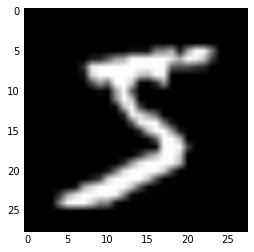

In [6]:
imshow(train_set[0][0].reshape((28, 28)), cmap = "gray")

5
0
4
1
9


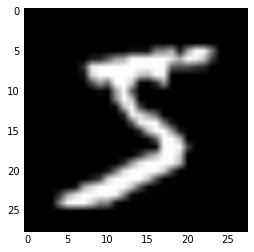

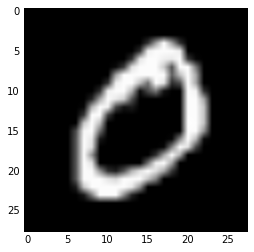

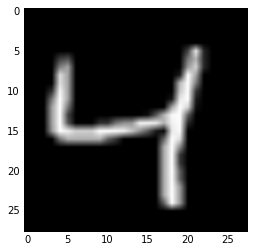

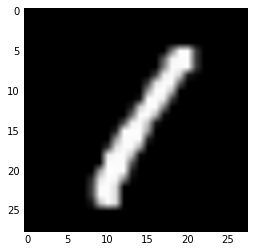

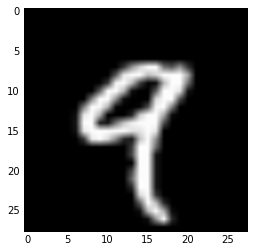

In [8]:
def show(x, i = [0]):
    plt.figure(i[0])
    imshow(x.reshape((28, 28)), cmap = "gray")
    i[0] += 1
for i in range(5):
    print train_set[1][i]
    show(train_set[0][i])

In [10]:
w = np.random.uniform(low = -1, high = 1, size = (28*28, 10))
b = np.random.uniform(low = -1, high = 1, size = 10)

In [11]:
x = train_set[0][0]
y = train_set[1][0]

In [37]:
Pr = exp ( dot ( x, w ) + b )
Pr.shape

(10L,)

In [38]:
Pr = Pr / Pr.sum ( )
print Pr

[  5.54340219e-04   3.28374617e-03   1.58009068e-06   1.29064726e-04
   9.74602591e-05   9.92548215e-01   1.55617687e-08   1.47449794e-06
   1.39392695e-05   3.37016420e-03]


In [39]:
loss = -log ( Pr [ y ] )
loss

0.0074796882535704493

In [40]:
gradb = Pr.copy ( )
gradb [ y ] -= 1
print gradb

[  5.54340219e-04   3.28374617e-03   1.58009068e-06   1.29064726e-04
   9.74602591e-05  -7.45178500e-03   1.55617687e-08   1.47449794e-06
   1.39392695e-05   3.37016420e-03]


In [41]:
print Pr.shape, x.shape, w.shape
gradw = dot ( x.reshape ( 784, 1 ), Pr.reshape ( 1, 10 ), )
gradw [ :, y ] -= x

(10L,) (784L,) (784L, 10L)


In [42]:
w -= 0.1 * gradw
b -= 0.1 * gradb

In [43]:
Pr = exp ( dot ( x, w ) + b )
Pr = Pr / Pr.sum ( )
loss = -log ( Pr [ y ] )
loss

0.0067980974343835225

In [45]:
w = np.random.uniform ( low = -1, high = 1, size = ( 28 * 28, 10 ) )
b = np.random.uniform ( low = -1, high = 1, size = 10 )
score = 0
N = 50000 * 20
d = 0.001
learning_rate = 1e-2
for i in xrange ( N ) :
    if i % 50000 == 0:
        print i, "%5.3f%%" % ( score * 100 )
    x = train_set [ 0 ][ i % 50000 ]
    y = train_set [ 1 ][ i % 50000 ]
    Pr = exp ( dot (x, w ) + b )
    Pr = Pr / Pr.sum ( )
    loss = -log ( Pr [ y ] )
    score *= ( 1 - d )
    if Pr.argmax ( ) == y :
        score += d
    gradb = Pr.copy ( )
    gradb [ y ] -= 1
    gradw = dot ( x.reshape ( 784, 1 ), Pr.reshape ( 1, 10 ), )
    gradw [ :, y ] -= x
    w -= learning_rate * gradw
    b -= learning_rate * gradb

0 0.000%
50000 87.166%
100000 89.077%
150000 89.577%
200000 90.056%
250000 90.552%
300000 90.857%
350000 90.937%
400000 91.081%
450000 91.356%
500000 91.409%
550000 91.510%
600000 91.551%
650000 91.648%
700000 91.784%
750000 91.782%
800000 91.803%
850000 91.747%
900000 91.742%
950000 91.835%


In [46]:
def compute_Pr ( x ) :
    Pr = exp ( dot ( x, w ) + b )
    return Pr / Pr.sum ( axis = 1, keepdims = True )
def compute_accuracy ( Pr, y ) :
    return mean ( Pr.argmax ( axis = 1 ) == y )

[7 2 1 0 4 1 4 9 6 9]
[7 2 1 0 4 1 4 9 5 9]


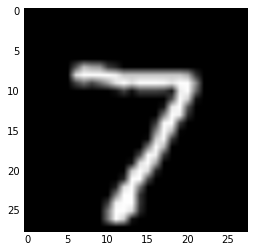

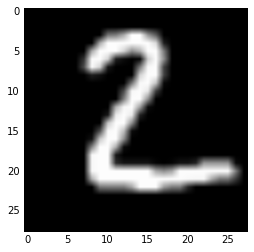

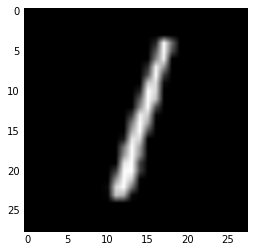

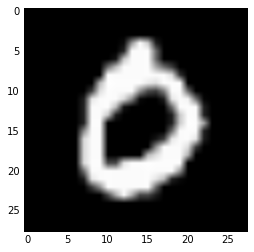

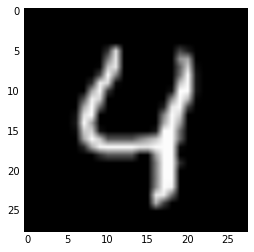

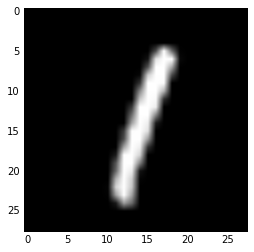

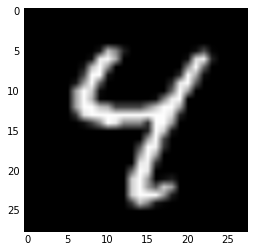

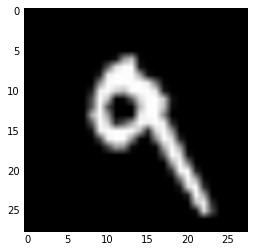

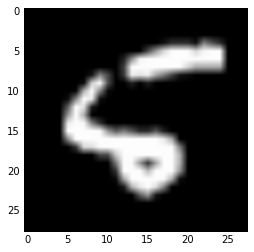

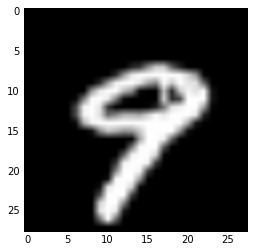

In [47]:
x = test_set [ 0 ][ :10 ]
y = test_set [ 1 ][ :10 ]
Pr = compute_Pr ( x )
print Pr.argmax ( axis = 1 )
print y
for i in range ( 10 ) :
    show ( x [ i ] )